## 使用时间序列分析美国股票案例
pandas时间序列的绘图功能在日期格式化方面比matplotlib原生的要好

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

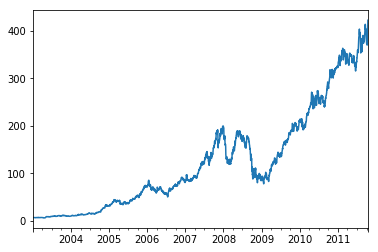

In [2]:
data_all=pd.read_csv('stock_px.csv',parse_dates=True,index_col=0)
data_some=data_all[['AAPL','MSFT','XOM']]
data_some=data_some.resample('B').ffill()
data_some['AAPL'].plot() #查看某只股票的数据
plt.show()

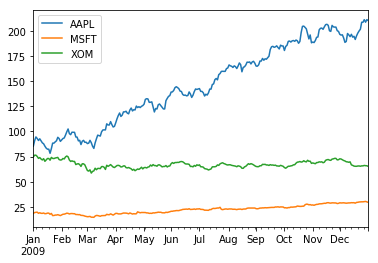

In [3]:
data_some.ix['2009'].plot() #查看某年的数据
plt.show()

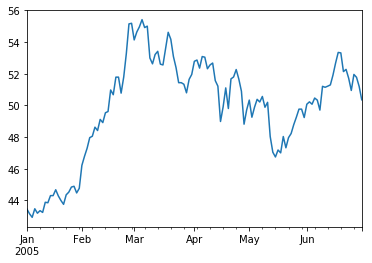

In [6]:
#查看XOM股票在2005年1-6月的股票走势
data_some['XOM'].ix['2005-01':'2005-06'].plot()
plt.show()

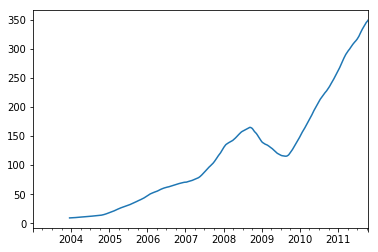

In [25]:
'''移动窗口函数:rolling()'''
pd.Series.rolling(data_some.AAPL,window=250,center=False).mean().plot() #AAPL股票250日均线
plt.show()

## 移动窗口函数的计算函数
图中的函数已经改变。
例如：rolling_mean()改成 rolling().mean()这种形式

![](http://i1.piimg.com/567571/763b08e01421c0b0.png)

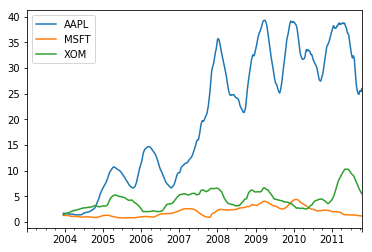

In [26]:
pd.Series.rolling(data_some,window=250,center=False).std().plot() #计算标准差
plt.show()

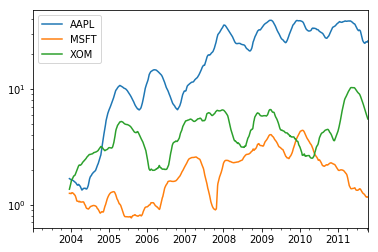

In [24]:
pd.Series.rolling(data_some,window=250,center=False).std().plot(logy=True) #计算标准差,logy参数表示应用到y轴上
plt.show()

### 性能和内存方面的注意事项
1.Timestamp和Period都是以64位整数表示（即NumPy的datetime64数据类型）。对于每个数据点其时间戳需要占用8字节的内存。
- 含有一百万个float64数据点的时间序列需要占用大约16MB的内存空间

2.由于pandas会尽量在多个时间序列之间共享索引，所以创建现有时间序列的视图不会占用更多内存